# Simple Linear Regression

## Importing The Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

## Importing The DataSet

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
x = data["age"].values.reshape(-1,1)
y = data['charges'].values.reshape(-1,1)

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

## Training the SimpleLinear Regression model on the Training set

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

## Predicting the Test set results

In [20]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[16274.65  9724.53]
 [15019.95  8547.69]
 [15270.89 45702.02]
 [18533.11 12950.07]
 [16023.71  9644.25]
 [11757.72  4500.34]
 [ 7742.68  2198.19]
 [16023.71 11436.74]
 [12761.49  7537.16]
 [11004.9   5425.02]
 [11757.72  6753.04]
 [15772.77 10493.95]
 [14016.19  7337.75]
 [11506.78  4185.1 ]
 [10001.14 18310.74]
 [15772.77 10702.64]
 [18282.17 12523.6 ]
 [ 9750.2   3490.55]
 [12761.49  6457.84]
 [ 8244.56 33475.82]
 [16023.71 23967.38]
 [17278.41 12643.38]
 [16274.65 23045.57]
 [15019.95 23065.42]
 [ 8746.44  1674.63]
 [11255.84  4667.61]
 [10252.08  3732.63]
 [13263.37  7682.67]
 [11004.9   3756.62]
 [14518.07  8413.46]
 [13263.37  8059.68]
 [18031.23 48970.25]
 [18784.05 12979.36]
 [17027.47 20630.28]
 [ 9248.32 14571.89]
 [10753.96  4137.52]
 [14769.01  8347.16]
 [10252.08 51194.56]
 [13263.37 40003.33]
 [ 8244.56  1880.49]
 [12259.61  5458.05]
 [10503.02  2867.12]
 [13012.43 20149.32]
 [17780.29 47496.49]
 [ 7742.68 36149.48]
 [ 8495.5  26018.95]
 [15772.77 19749.38]
 [13765.25  6

## Visualising The Train Set Results

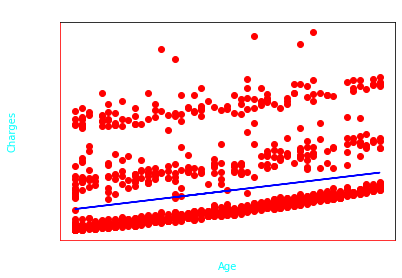

In [7]:
fig = plt.figure()

ax = fig.add_subplot()

ax.set_xlabel('Age')
ax.set_ylabel('Charges')

ax.xaxis.label.set_color('cyan')        #setting up X-axis label color to cyan
ax.yaxis.label.set_color('cyan')          #setting up Y-axis label color to cyan

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to white

ax.spines['left'].set_color('red')  # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('red') # setting up X-axis tick colot to red

plt.scatter(x=x_train,y=y_train,color='red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('insurance costs',color="White")

plt.show()

## Visualising The Test Set Results

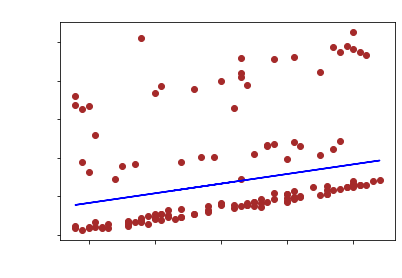

In [8]:
plt.scatter(x_test, y_test, color = 'brown')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Insurance costs',color='white')
plt.xlabel('Age',color="white")
plt.ylabel('Charges',color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()

## Evaluating the Model Performance

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.061433180578732594

In [22]:
regressor.predict([[20],
                   [30],
                   [60]])

array([[ 8244.56],
       [10753.96],
       [18282.17]])

In [11]:
obj_column = list(data.select_dtypes(['object']).columns)

In [15]:
data_encoded = pd.get_dummies(data=data,columns=obj_column)
data_encoded = data_encoded[["sex_female",'sex_male','smoker_no','smoker_yes',\
                             'region_northeast','region_northwest','region_southeast',\
                             'region_southwest','age','bmi','children','charges']]
data_encoded.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1,0,0,1,0,0,0,1,19,27.900,0,16884.92400
1,0,1,1,0,0,0,1,0,18,33.770,1,1725.55230
2,0,1,1,0,0,0,1,0,28,33.000,3,4449.46200
3,0,1,1,0,0,1,0,0,33,22.705,0,21984.47061
4,0,1,1,0,0,1,0,0,32,28.880,0,3866.85520
